# Assignment 7: K-Means Clustering
#### DSC-540
#### Author: David Bui
#### 12/15/2021

Referring to the chosen dataset, formulate three questions worth asking about the data, and explain why it is important and beneficial to ask these questions. Ask yourself: “What can I learn by grouping similar data points together and discovering underlying patterns?”

While the readings for this topic are comprehensive, you may use the GCU digital library to find additional articles describing the use of kmeans.

Perform a Kmeans cluster analysis, plot the results, and interpret them.

Use the results above and answer the questions you previously formulated. For each question write the answer mathematical/quantitative terms. Explain the results and the meaning of the patterns you uncovered. Use additional plots to support your arguments.

### Dataset: Heart Disease UCI
Source: https://www.kaggle.com/ronitf/heart-disease-uci

There is a supermarket mall that records it's customer's data through membershipcards. The data can be used to make a distinction between customers via their spending score. There are 200 customers within the dataset, each with 5 features.

List of Features:

    *1. age      - Age of patient
    *2. sex      - 1 = male, 0 = female
    *3. cp       - Chest Pain Type
    *4. trestpbs - Resting blood pressur
    *5. chol     - serum cholestoral in mg/dl
    *6. fbs      - Fasting Blood Sugar 120mg/dl, 1 = true, 0 = false
    *7. restecg  - Resting Electrocardiographic Results
    *8. thalach  - Maximum Heart Rate achieved
    *9. exang    - Exercise induced angina, 1 = yes, 0 = no
    *10. oldpeak - ST depression induced by exercise relative to rest
    *11. slope   - The slope of the peak exercise ST segment
    *12. ca      - Number of major vessels (0-3) colored by flourosopy
    *13. thal    - 3 = normal, 6 = fixed defect; 7 = reversable defect
    *14. target  - Heart Disease, 1 = Yes, 0 = No
    
### The Goal:
To isolate a group with the highest rate of heart disease possible, with the use of K-means clsutering.

In [10]:
# Initial Package setup
import pandas as pd # dataframe
import numpy as np # for array math
import seaborn as sns
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt # plotting
from sklearn.cluster import KMeans # the algorithm
from sklearn.decomposition import PCA # Need this to reduce dimensionality
from sklearn.preprocessing import StandardScaler # Gotta make sure everything is unit norm
from sklearn.preprocessing import OrdinalEncoder # To encode the variables. 
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [11]:
path = r'C:\Users\David\OneDrive\Desktop\GCU Studies\DSC-540\Topic 7\Assignment\Data\heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
X = df.drop("target", axis=1)
y = df["target"]

It is quite well known that there is a correlation between cholesterol to heart disease, as well as age. These two attributes can be used to form clusters. Looking below I found that within the sample collected, there doesn't appear to be much of a correlation. Which begs the question what I can do in terms of k-means clustering.

<AxesSubplot:xlabel='age', ylabel='chol'>

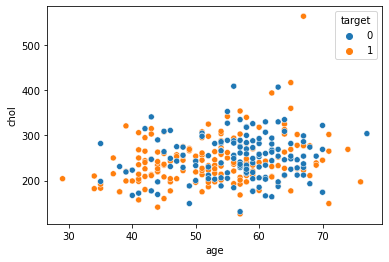

In [14]:
sns.scatterplot(x = "age", y = "chol", data = df, hue = "target")

first an elbow method should be used to approximate the number of clusters that should be used.
The optimal k number of clusters seems to be around 2 or 3. 2 Does appear to be the point of inflection.

C:\Users\David\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


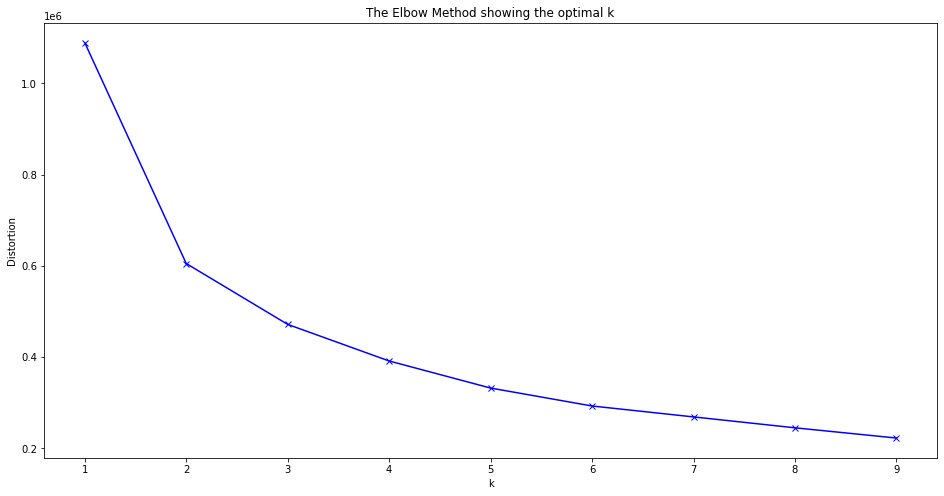

In [15]:
# Elbow Method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Here the k-means clustering method is being used for classification.

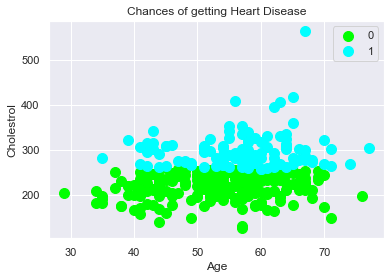

In [16]:
from sklearn.cluster import KMeans

Xloc = df.iloc[:,:12].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Xloc)
sns.set()

plt.scatter(Xloc[y_kmeans == 0, 0], Xloc[y_kmeans == 0,4], s = 100, c = 'lime', label = '0')
plt.scatter(Xloc[y_kmeans == 1, 0], Xloc[y_kmeans == 1, 4], s = 100, c = 'cyan', label = '1')

plt.title('Chances of getting Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()


## Question 1:
With a modern day understanding of cholestoral/age and their correlation with heart disease, can k-means clustering find a suite for reasonable distinction with our given dataset?

A cosstab table can be used to examine each grouping to the target feature. This method should reveal the defining differences amoung each group that is relative to heart disease. I should also be noted that the previous model is pulling in the entire dataset into the kmeans function. the graph is only illustrating two key elements where division is occuring for cholesterol and age, this division changes depending on which features are selected, but the accuracy stays the same throughout all depictions.

In [17]:
y_kmeans = y_kmeans.astype(int)
# 1 = True, 0 = False
pd.crosstab(y_kmeans,y,margins = True,  normalize='index')


target,0,1
row_0,,
0,0.404145,0.595855
1,0.545455,0.454545
All,0.455446,0.544554


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_kmeans)

0.42244224422442245

As I first theorized, cholestrol and age isn't yielding a significant level of distinction. Which is contrary to modern day medical understanding. There appears to be something else going on within this group.

## Question 2
With the aid of Principle Component Analysis, what improvements can be made on this basic form of k-means clustering method?

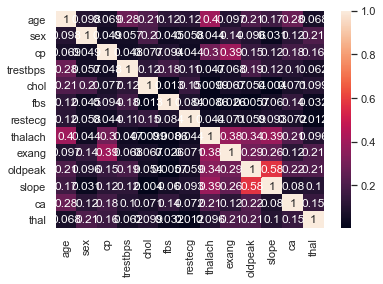

In [19]:
corr = X.corr().abs()
sns.heatmap(corr, annot=True)
plt.show()

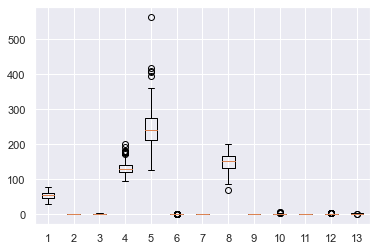

In [20]:
plt.boxplot(X)
plt.show()

As the previous two charts show

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:12].values
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
#
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scale)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.127110,-0.476358
1,-0.127572,-0.387249
2,-0.647683,0.435639
3,-0.274417,-0.439116
4,0.207764,0.878942
...,...,...
298,0.362035,0.958402
299,-0.343896,-0.498003
300,0.178571,-0.318500
301,0.837393,0.051568


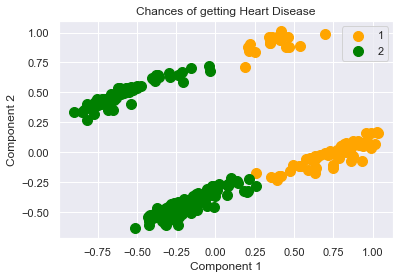

In [22]:
principalDf = principalDf.iloc[:,:].values
pca_kmeans = kmeans.fit_predict(principalDf)
sns.set()

plt.scatter(principalDf[pca_kmeans == 0, 0], principalDf[pca_kmeans == 0,1], s = 100, c = 'orange', label = '1')
plt.scatter(principalDf[pca_kmeans == 1, 0], principalDf[pca_kmeans == 1,1], s = 100, c = 'green', label = '2')

plt.title('Chances of getting Heart Disease')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [23]:
pd.crosstab(pca_kmeans,y,margins = True,  normalize='index')

target,0,1
row_0,,
0,0.785714,0.214286
1,0.297561,0.702439
All,0.455446,0.544554


In [24]:
accuracy_score(y, pca_kmeans)

0.7293729372937293

The return of 72.9% is a significant increase from the previous 42.2% accuracy of the clusters. PCA has its way of smoothing our noise when mixing attributes, perfect for this situation of clustering.

## Alternative method to PCA

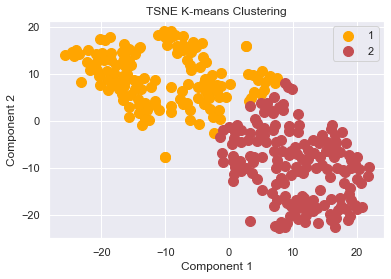

In [35]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
tsne_kmeans = kmeans.fit_predict(dftsne)
dftsne['cluster'] = tsne_kmeans
dftsne.columns = ['x1','x2','cluster']
dftsne = dftsne.iloc[:,:].values

sns.set()
plt.scatter(dftsne[tsne_kmeans == 0, 0], dftsne[tsne_kmeans == 0,1], s = 100, c = 'orange', label = '1')
plt.scatter(dftsne[tsne_kmeans == 1, 0], dftsne[tsne_kmeans == 1,1], s = 100, c = 'r', label = '2')

plt.title('TSNE K-means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [36]:
accuracy_score(y, tsne_kmeans)


0.5907590759075908

## Question 3:
What are the mean attributes of patients with heart disease in terms of pca_kmeans, and what are the key features healthcare providers should look for?

In [27]:
df1 = df
df1['pca_kmeans'] = pca_kmeans
df1[df1["pca_kmeans"] == 1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pca_kmeans
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,53.604878,0.634146,1.268293,130.834146,243.385366,0.141463,0.546341,155.946341,0.009756,0.788293,1.521951,0.629268,2.234146,0.702439,1.0
std,9.433200,0.482848,1.000598,16.445448,52.624668,0.349352,0.508794,21.313534,0.098531,1.012791,0.598819,1.014175,0.545754,0.458305,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,46.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,146.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.0
50%,54.000000,1.000000,1.000000,130.000000,235.000000,0.000000,1.000000,160.000000,0.000000,0.400000,2.000000,0.000000,2.000000,1.000000,1.0
75%,61.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,171.000000,0.000000,1.200000,2.000000,1.000000,3.000000,1.000000,1.0
max,76.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.0


In [37]:
df1[df1["pca_kmeans"] == 0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pca_kmeans
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0
mean,55.959184,0.785714,0.336735,133.275510,252.285714,0.163265,0.489796,136.469388,0.989796,1.565306,1.142857,0.938776,2.479592,0.214286,0.0
std,8.116317,0.412436,0.785748,19.615784,49.855461,0.371508,0.560649,20.463800,0.101015,1.275632,0.574367,1.013480,0.706809,0.412436,0.0
min,35.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,51.000000,1.000000,0.000000,120.000000,213.750000,0.000000,0.000000,122.250000,1.000000,0.450000,1.000000,0.000000,2.000000,0.000000,0.0
50%,57.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,139.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.000000,0.0
75%,61.000000,1.000000,0.000000,140.000000,285.250000,0.000000,1.000000,150.000000,1.000000,2.475000,1.000000,2.000000,3.000000,0.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,186.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000,0.0


In [38]:
df1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pca_kmeans
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,-0.121462
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.152397
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.422935
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,-0.065225
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.080461
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.028679
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.050384
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.398431
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.977465
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,-0.313569


In [42]:
corr = df.corr().abs()
corr[corr['target']>0.4].index

Index(['cp', 'thalach', 'exang', 'oldpeak', 'target', 'pca_kmeans'], dtype='object')

In [43]:
corr = df1.corr().abs()
corr[corr['tar']>0.4].index

Index(['cp', 'exang', 'target', 'pca_kmeans'], dtype='object')

When analzying pca_kmeans, it appears that chest pain type and excerise induced angina are the main features playing into the division. Without pca thalach and oldpeak are included. These are the attibutes healthcare providers should be looking for when dealing with those that find themselves in this dataset.

## References:
Arvai, Kevin, (2020), K-means Clustering in Python: A Practical Guide, Real Python, https://realpython.com/k-means-clustering-python/

Tam, Adrian, (2021), Principal Component Analysis for Visualization, Machine Learning Mastery, https://machinelearningmastery.com/principal-component-analysis-for-visualization/